In [1]:
import sys
import os
import glob

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

List of audacity files

In [3]:
datadir = os.path.join('C:\\Users\\acoustics','My Documents\\GitHub\\legato-transients\\transfer')

glob.glob(os.path.join(datadir,'*.aup'))
#os.listdir(os.path.join(datadir))

['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_1101_run1.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_1101_run2.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_1101_run3.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_1850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_2850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_3850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_4850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_5850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_6850.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_closed_allpluggedfoot.aup',
 'C:\\Users\\acous

In [39]:
dfiles = ['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\closed_allplugged2.aup',
          'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_open_pluggedfoot.aup',
          'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_open_allpluggedfoot.aup',
          'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\reference.aup']

Load File, read data, and pad to have same length on all channels

In [48]:
nfft=1024*2

tfdata = []

for file in dfiles:
    print(file)
    au = audacity.Aup(file)
    rdata = []
    maxl = 0
    for ii in range(au.nchannels):
        rdata.append(au.get_channel_data(ii))
        maxl = max(maxl,len(rdata[-1]))

    data = np.zeros((maxl,len(rdata)))
    for ii,rd in enumerate(rdata):
        data[:len(rd),ii]=rd
        
    delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,1]/np.mean(data[:,1]),maxdel=2**15)
    print("Delay: %d samples"%delay)
    data[:,0]=np.roll(data[:,0],delay)
    
    sr=au.rate
   
    tfxy,ff=tf.tfe(data[:,2],data[:,1],Fs=sr,NFFT=nfft)
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ff,coh=sig.coherence(data[:,1],data[:,2],fs=sr,nperseg=nfft)

    datadict={'tf':tfxy,'coh':coh}
    
    for chno in [1,2]:
        tfxy,ff=tf.tfe(data[:,chno],data[:,0],Fs=sr,NFFT=nfft)
        #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
        # ff,coh=sig.coherence(data[:,0],data[:,chno],fs=sr,nperseg=nfft)
        datadict['mic%d'%chno]=tfxy

    tfdata.append(datadict)


C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\closed_allplugged2.aup
Delay: 1745 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\2tieclip_open_pluggedfoot.aup
Delay: -3985 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\2tieclip_open_allpluggedfoot.aup
Delay: 1748 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\reference.aup
Delay: 1704 samples


<IPython.core.display.Javascript object>


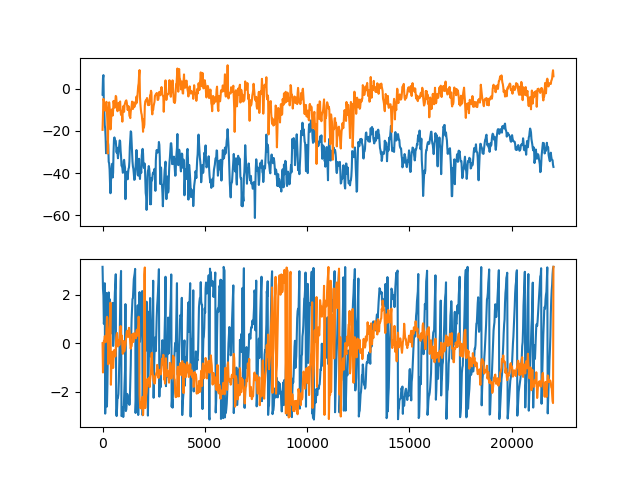

In [49]:
fig,ax = pl.subplots(2,sharex=True)

recno = 0
refno = 3
ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic2']/tfdata[refno]['mic2'])))
ax[1].plot(ff,(np.angle(tfdata[recno]['mic2']/tfdata[refno]['mic2'])))

ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic1']/tfdata[refno]['mic1'])))
ax[1].plot(ff,(np.angle(tfdata[recno]['mic1']/tfdata[refno]['mic1'])))


<IPython.core.display.Javascript object>


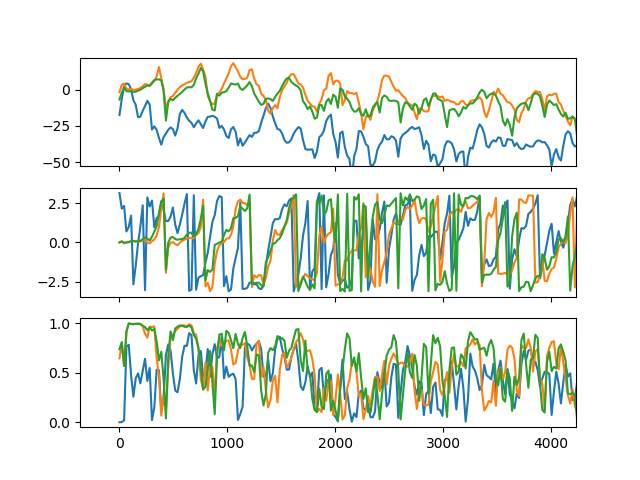

In [50]:
fig,ax = pl.subplots(3,sharex=True)

chno = 1
refno = 3
for recno in [0,1,2]: 

    ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['tf']/tfdata[refno]['tf'])))
    ax[1].plot(ff,(np.angle(tfdata[recno]['tf']/tfdata[refno]['tf'])))
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ax[2].plot(ff,np.min([tfdata[recno]['coh'],tfdata[refno]['coh']],axis=0))



In [19]:
sig.coherence?